In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab

In [2]:
directorio = 'datos_histogramas/'
nombrearchivo='data104.csv'
data = pd.read_csv(directorio + nombrearchivo,header=None,names={'data'})

In [3]:
data[0:10] #Mostrar primeros datos

,data
0,33.932
1,34.486
2,40.375
3,41.778
4,52.259
5,52.627
6,53.240
7,53.293
8,54.696
9,55.088


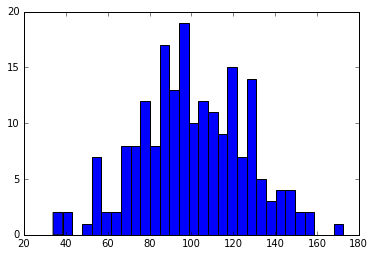

In [4]:
count, bin_edges, ignored = plt.hist(data['data'], 30, normed=False)
#muestro el grafico
plt.show()

Numero de bins = 14


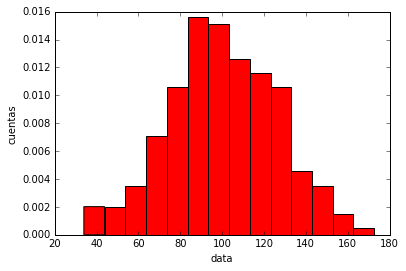

In [5]:
#nbins = 30
#nbins = int(1 + np.log2(len(data))) # Sturges
nbins = int(np.sqrt(len(data))) # Sqrt
print("Numero de bins = " + str(nbins))

#grafico el histograma y de paso calculo los valores
colors = ['red'] # [1,0,0]
#count, bin_centers, ignored = plt.hist(result['data'], nbins, normed=True,color=colors)
count, bin_edges, ignored = plt.hist(data['data'], nbins, normed=True,color=colors)

#le pongo nombres a los ejes
plt.xlabel('data')
plt.ylabel('cuentas')

#muestro el grafico
plt.show()

In [6]:
nombrearchivo='data102.csv'
data2 = pd.read_csv(directorio + nombrearchivo,header=None,names={'data2'})
result = pd.concat([data, data2], axis=1)

result[0:10]

,data,data2
0,33.932,75.525
1,34.486,52.541
2,40.375,48.527
3,41.778,66.637
4,52.259,55.225
5,52.627,37.624
6,53.240,49.322
7,53.293,42.818
8,54.696,18.375
9,55.088,58.399


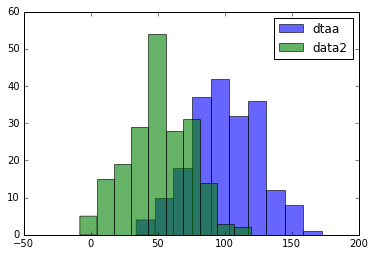

In [7]:
plt.hist(result["data"], alpha=0.6, label="dtaa")
plt.hist(result["data2"], alpha=0.6, label="data2")
plt.legend()
plt.show()

In [8]:
media = np.mean(data['data'])
desvio = np.std(data['data'],ddof=1)
N = len(data['data'])
sem = desvio / np.sqrt(N)

In [9]:
np.sqrt(sum(np.power(data['data']-media,2))/(N-1))

25.843977855697911

In [10]:
desvio # Para imprimir los valores, puedo sólo escribirlos al final de la celda

25.843977855697911

In [11]:
print('Media = ' + str(media)) # ... puedo convertirlos a texto (str()) y unirlos a otro texto (con +)
print('Desvio estandar = %s'%str(desvio)) # ... puedo convertirlos a texto (str()) y llamarlos como variable (%s), lo bueno es que puedo llamar muchas variables.
print('Error estandar de la media = %f'%sem) # ... puedo llamarlo como variable numérica (%f)
print('Error estandar de la media = %0.3f'%sem) # ... puedo llamarlo como variable numérica (%f) controlando el número de decimales que muestra


Media = 100.191465
Desvio estandar = 25.8439778557
Error estandar de la media = 1.827445
Error estandar de la media = 1.827


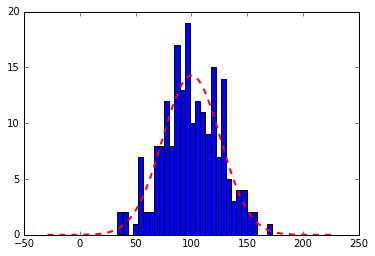

In [21]:
# Grafico Gaussiana sobre el histograma usando los valores antes calculados
nbins = 30

#grafico el histograma y de paso calculo los valores
count, bins, ignored = plt.hist(data['data'], nbins, normed=False)

bin_size=bins[1]-bins[0] # calculo el ancho de los bins del histograma

x_gaussiana=np.linspace(media-5*desvio, media+5*desvio, num=100) # armo una lista de puntos donde quiero graficar la distribución de ajuste

gaussiana=mlab.normpdf(x_gaussiana, media, desvio)*N*bin_size # calculo la gaussiana que corresponde al histograma

plt.plot(x_gaussiana,gaussiana,'r--', linewidth=2, label='ajuste 1') #grafico la gaussiana

plt.show()

sigma: 20.000010 ± 3713.461634
media: 97.210602 ± 4547.501147


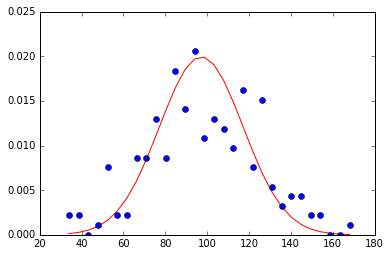

In [34]:
from scipy.optimize import curve_fit

x = bins[1:]-bin_size
y = count

def func(x, m, d):
    return a*mlab.normpdf(x, m, d)

#popt, pcov = curve_fit(func, x, y, bounds=([95., 20.], [105., 30.]))
popt, pcov = curve_fit(func, x, y, p0=(media,desvio))
sigmas = np.sqrt([pcov[0,0],pcov[1,1]])# las incertezas de los parametros son la raiz de la diagonal de la matriz de covarianza
m=popt[0]
d=popt[1]
em=sigmas[0]
ed=sigmas[1]
print('sigma: %f ± %f'% (d,ed))
print('media: %f ± %f' % (m,em))
print('A: %f ± %f' % (a,ea))

plt.plot(x, func(x, *popt), 'r-')
plt.plot(x, y/(N*bin_size),'bo')
plt.show()